# WebAssembly Introduction

### Learning Objectives

- Gain experience running **[ITK-Wasm](https://wasm.itk.org)** in system Python, browser Python, JavaScript, and on the command line
- Understand how **[WebAssembly](https://webassembly.org/) (wasm) binaries** are similar and different traditional native binaries
- Understand the difference between the **[Emscripten](https://emscripten.org/)** and **[WASI](https://wasi.dev/)** toolchains and runtimes
- Identify the basic **WebAssembly datatypes** and how a **runtime interfaces** with WebAssembly, and how **ITK-Wasm enables analysis of spatial scientific data in wasm**.

## Overview

### ITK-Wasm: Sustainably Deploy Elegant, Modern C++ Everywhere

*ITK-Wasm* combines [ITK](https://www.itk.org/) and [WebAssembly](https://webassembly.org/) to enable high-performance spatial analysis in a web browser or system-level environments and reproducible execution across programming languages and hardware architectures.

The project provides tools to

- build C/C++ code to [WebAssembly](https://webassembly.org/).
- bridge local filesystems, JavaScript/TypeScript/Python data structures, and traditional file formats.
- transfer data efficiently in and out of the WebAssembly runtime.
- perform asynchronous, parallel execution of processing pipelines in a worker pool.

*ITK-Wasm* can be used to execute [ITK](https://www.itk.org/) or arbitrary C++ codes in the browser, on the command line, and in languages like Python via [WASI](https://wasi.dev/) and [Emscripten](https://emscripten.org) runtimes.

### Universality

`itkwasm` Python packages run on *all modern web browsers and at a system level across all major operating systems and hardware architectures*.

![environment dispatch diagram](./figures/environment-dispatch-mermaid.png)

All versions of Python 3.8+ are supported.

Additionally, non-wasm packages accelerate performance via GPUs when available.

In the browser, [Pyodide](https://pyodide.org/)-compatible packages provide client-side web app scripting in Python, including via [PyScript](https://pyscript.net/), and sustainable, scalable Jupyter deployments via [JupyterLite](https://jupyterlite-sphinx.readthedocs.io/).

At a system level, Linux, macOS, and Windows operating systems are supported on x86_64 and ARM via [wasmtime-py](https://bytecodealliance.github.io/wasmtime-py/) {octicon}`zap`.

`itkwasm` Python packages are *highly modular*, have *a tiny footprint*, and have *minimal dependencies*; they only depend on `itkwasm`, `numpy`, and `pyodide` or [`wasmtime`](https://wasmtime.dev/).

### Visible Human Male

Let's **visualize the Visible Human Male** with ITK-Wasm. This dataset from the [Visible Human Project](https://www.nlm.nih.gov/research/visible/visible_human.html) originally motivated the creation of ITK.

In [1]:
import itkwasm
import itkwasm_image_io
import itkwasm_downsample

import itk
# Print when a module is loaded
itk.auto_progress(2)

from itkwidgets import view
from rich import print

Loading ITKPyBase... done
Loading ITKCommon... done
Loading ITKStatistics... done
Loading ITKImageFilterBase... done
Loading ITKTransform... done
Loading ITKMesh... done
Loading ITKImageFunction... done
Loading ITKSpatialObjects... done
Loading ITKImageCompose... done
Loading ITKImageStatistics... done
Loading ITKPath... done
Loading ITKImageGrid... done
Loading ITKImageIntensity... done
Loading ITKThresholding... done
Loading ITKSignedDistanceFunction... done
Loading ITKOptimizers... done
Loading ITKFiniteDifference... done
Loading ITKCurvatureFlow... done
Loading ITKNarrowBand... done
Loading ITKImageSources... done
Loading ITKFFT... done
Loading ITKConvolution... done
Loading ITKSmoothing... done
Loading ITKImageGradient... done
Loading ITKImageFeature... done
Loading ITKImageCompare... done
Loading ITKIOImageBase... Loading ITKIOBMP... done
Loading ITKIOBioRad... done
Loading ITKIOBruker... done
Loading ITKIOGDCM... done
Loading ITKIOIPL... done
Loading ITKIOGE... done
Loading ITKI


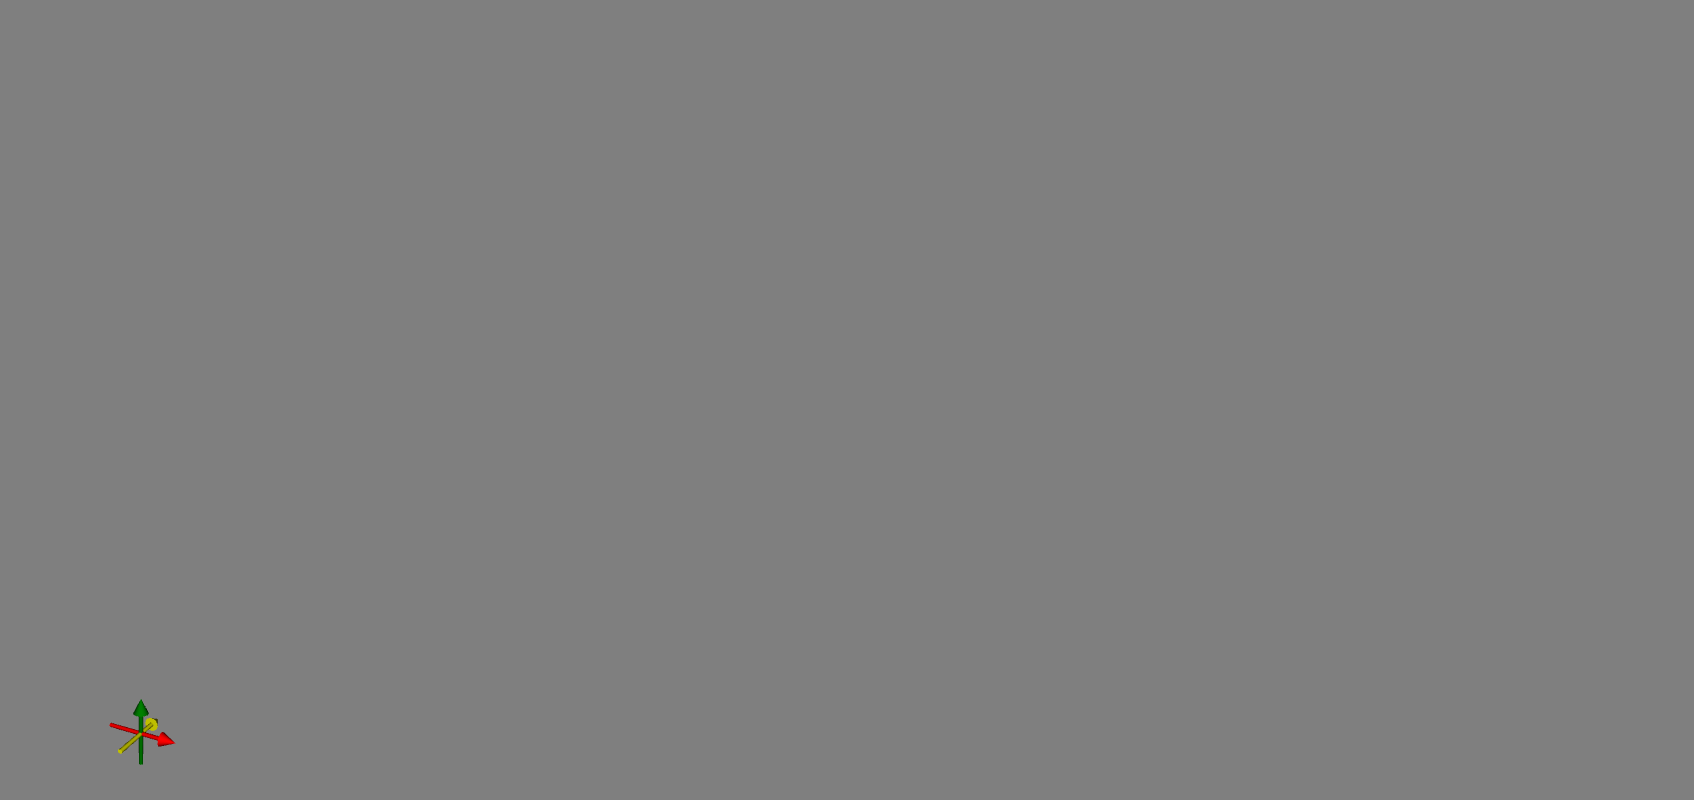
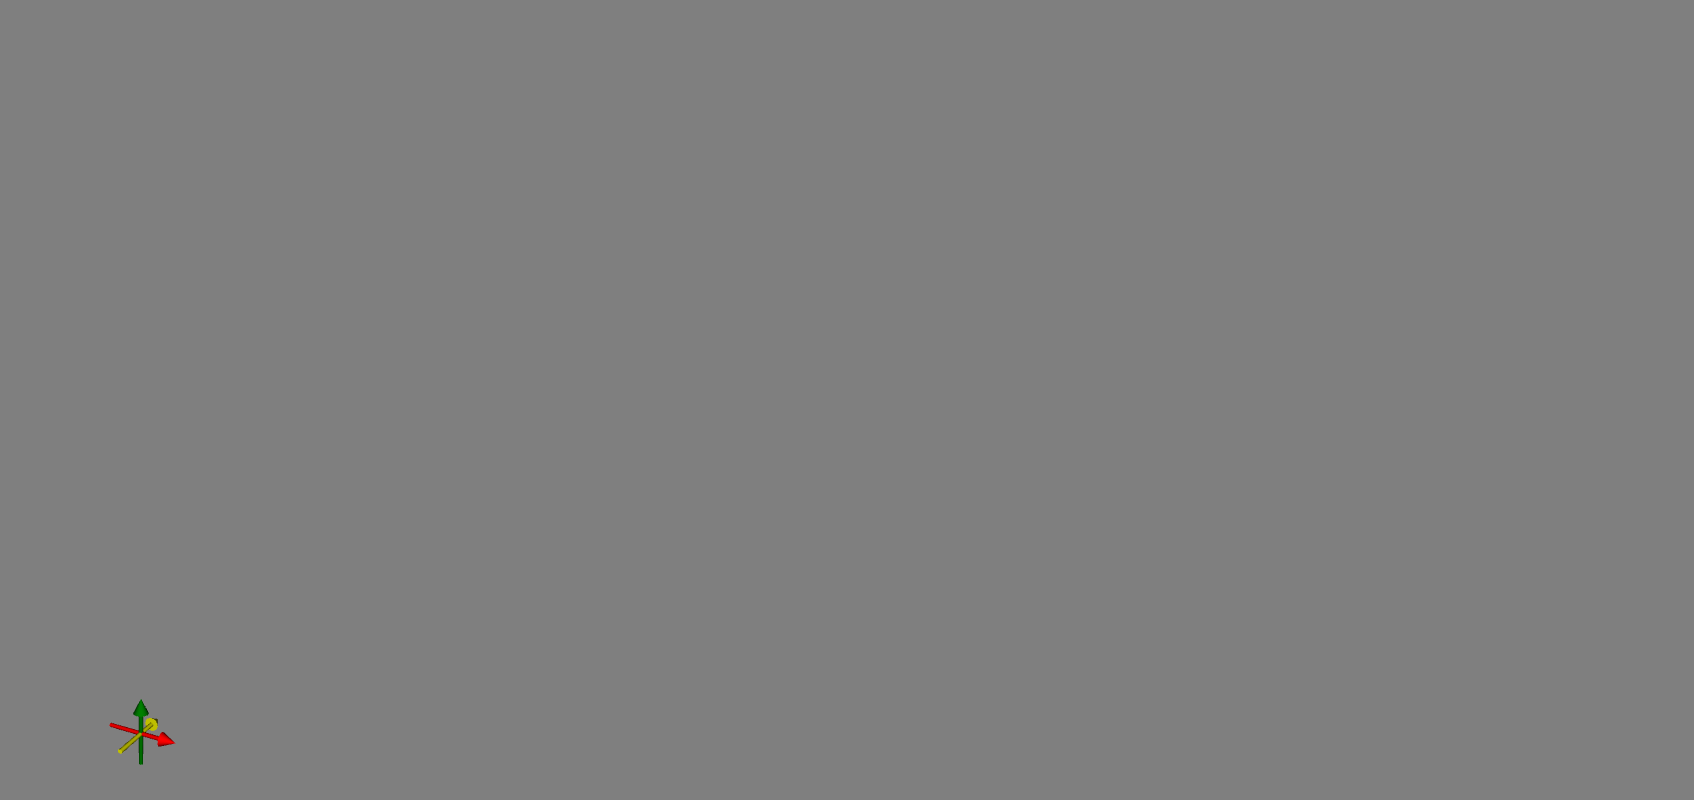

<IPython.core.display.Javascript object>

In [2]:
filepath = 'data/visible_male.nrrd'

image = itkwasm_image_io.imread(filepath)

view(image)

Note the speed!

How did ITK-Wasm make this possible?

1. ITK's NRRD image IO functionality is exposed through the `itkwasm-image-io` package
2. An [OME-Zarr](https://www.biorxiv.org/content/10.1101/2023.02.17.528834v4) multiscale spatial image representation is dynamically generated with ITK-Wasm filters in [itkwidgets](https://github.com/InsightSoftwareConsortium/itkwidgets)
3. The chunked, multiscale representation is progressively decompressed in parallel in the browser with ITK-Wasm 

## Native vs Wasm system Python

### Data structures

Let's examine the differences between the data structures in the native binary `itk` Python packages and `itkwasm` Python packages.

In [3]:
native_image = itk.imread(filepath)
print(native_image)

Loading ITKPyUtils... done
Running itkImageFileReaderIUC3... done


Image (0x55ee3d2955c0)
  RTTI typeinfo:   itk::Image<unsigned char, 3u>
  Reference Count: 2
  Modified Time: 497
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (0x55ee3dbda080) 
  Source output name: Primary
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 308
  UpdateMTime: 498
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [128, 256, 256]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [128, 256, 256]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [128, 256, 256]
  Spacing: [1.57774, 0.995861, 1.00797]
  Origin: [-100.975, -127.47, -129.02]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1.57774 0 0
0 0.995861 0
0 0 1.00797

  PointToIndexMatrix: 
0.633818 0 0
0 1.00416 0
0 0 0.992093

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x55ee3d4f7840)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned char>
      Reference Count: 1
      Modified Time: 495
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0x55ee3dc7fb20
      Container manages memory: true
      Size: 8388608
      Capacity: 8388608

In [4]:
wasm_image = itkwasm_image_io.imread(filepath)
print(wasm_image)

Image(
    imageType=ImageType(dimension=3, componentType='uint8', pixelType='Scalar', components=1),
    name='Image',
    origin=[-100.97536, -127.470208, -129.02016],
    spacing=[1.57774, 0.9958609999999999, 1.00797],
    direction=array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]),
    size=[128, 256, 256],
    metadata=[],
    data=array([[[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       ...,

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  2, ...,  2,  1,  1],
        ...,
        [ 1,  1, 12, ..., 19,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]]], dtype=uint8)
)

### **Key points:**

#### Native

- Native bindings share data in memory across the process with pointers
- Native bindings shared pointer-based references to library-specific data structures

#### Wasm

- ITK-Wasm bindings memory access is completely sandboxed
- ITK-Wasm provides interfaces with simple data structures that enable idiomatic (Pythonic in this case) access across programming languages

WebAssembly's approach has constraints to how data is managed, but the benefits are:

- Extreme portability
- Sustainability
- Maintainability
- Security
- Scalability (easy parallel processing)
- The ability to build modular, component-based application that can even be built from multiple programming languages

### Python, NumPy interop

`itkwasm` interface types, used in function calls, are standard [Python `dataclasses`](https://docs.python.org/3/library/dataclasses.html). These interface types are composed of standard Python datatypes, `dict`, `list`, `float`, `int`, and [NumPy](https://numpy.org/) arrays.

#### Convert from `itkwasm` to `dict`

To convert from an `itkwasm` dataclass interface type to a Python dictionary, use [`asdict`](https://docs.python.org/3/library/dataclasses.html#dataclasses.asdict) from the Python standard library.

An example with [`itkwasm.Image`](#itkwasm.image.Image):

```python
from itkwasm import Image
image = Image()

from dataclasses import asdict
image_dict = asdict(image)
```

#### Convert from `dict` to `itkwasm`

To convert back to an `itkwasm` interface type, use the `**` Python operator to expand the dictionary into keyword arguments for the dataclass constructor.

```python
from itkwasm import Image
image = Image(**image_dict)
```

In [5]:
from dataclasses import asdict
print(asdict(wasm_image))

{
    'imageType': {'dimension': 3, 'componentType': 'uint8', 'pixelType': 'Scalar', 'components': 1},
    'name': 'Image',
    'origin': [-100.97536, -127.470208, -129.02016],
    'spacing': [1.57774, 0.9958609999999999, 1.00797],
    'direction': array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]),
    'size': [128, 256, 256],
    'metadata': [],
    'data': array([[[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       ...,

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  2, ...,  2,  1,  1],
        ...,
        [ 1,  1, 12, ..., 19,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]]], dtype=uint8)
}

### ITK Python interop

`itkwasm` can be used with native [`itk` Python bindings](https://docs.itk.org/en/latest/learn/python_quick_start.html).

Both packages support common Python dictionary representations of the data structures used on interfaces. The non-dictionary types are more convenient to work with directly and provide strong typing for function calls.

#### Convert from `itkwasm` to `itk`

To convert from an `itkwasm` dataclass interface type to a native `itk` Python type, first convert the `itkwasm` type to a dictionary, then use the `itk.<type>_from_dict` function. Example:

```python
from itkwasm import Image
from dataclasses import asdict
itkwasm_image = Image()
image_dict = asdict(itkwasm_image)

import itk
itk_image = itk.image_from_dict(image_dict)
```

#### Convert from `itk` to `itkwasm`

To convert from a native `itk` Python type to an `itkwasm` dataclass interface type, first convert the `itkwasm` type to a dictionary the `itk.<type>_from_dict`, then pass the dictionary as keyword arguments to `itkwasm` constructor with the `**` operator. Example:


```python
import itk
# Create an itk.Image
itk_image = itk.Image.New()
itk_image.SetRegions([8,8])
itk_image.Allocate()
image_dict = itk.dict_from_image(itk_image)

from itkwasm import Image
itkwasm_image = Image(**image_dict)
```


In [6]:
image_dict = asdict(wasm_image)
native_image = itk.image_from_dict(image_dict)
print(native_image)

Loading ITKBridgeNumPy... done


Image (0x55ee3d290e70)
  RTTI typeinfo:   itk::Image<unsigned char, 3u>
  Reference Count: 1
  Modified Time: 509
  Debug: Off
  Object Name: Image
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [128, 256, 256]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [128, 256, 256]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [128, 256, 256]
  Spacing: [1.57774, 0.995861, 1.00797]
  Origin: [-100.975, -127.47, -129.02]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1.57774 0 0
0 0.995861 0
0 0 1.00797

  PointToIndexMatrix: 
0.633818 0 0
0 1.00416 0
0 0 0.992093

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x55ee3c472ef0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned char>
      Reference Count: 1
      Modified Time: 500
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0x55ee3ec7fb60
      Container manages memory: false
      Size: 8388608
      Capacity: 8388608

### Minimizing package size, complexity, and sharing of state

Let's look at another example of generating a downsampled version of the Visible Male.


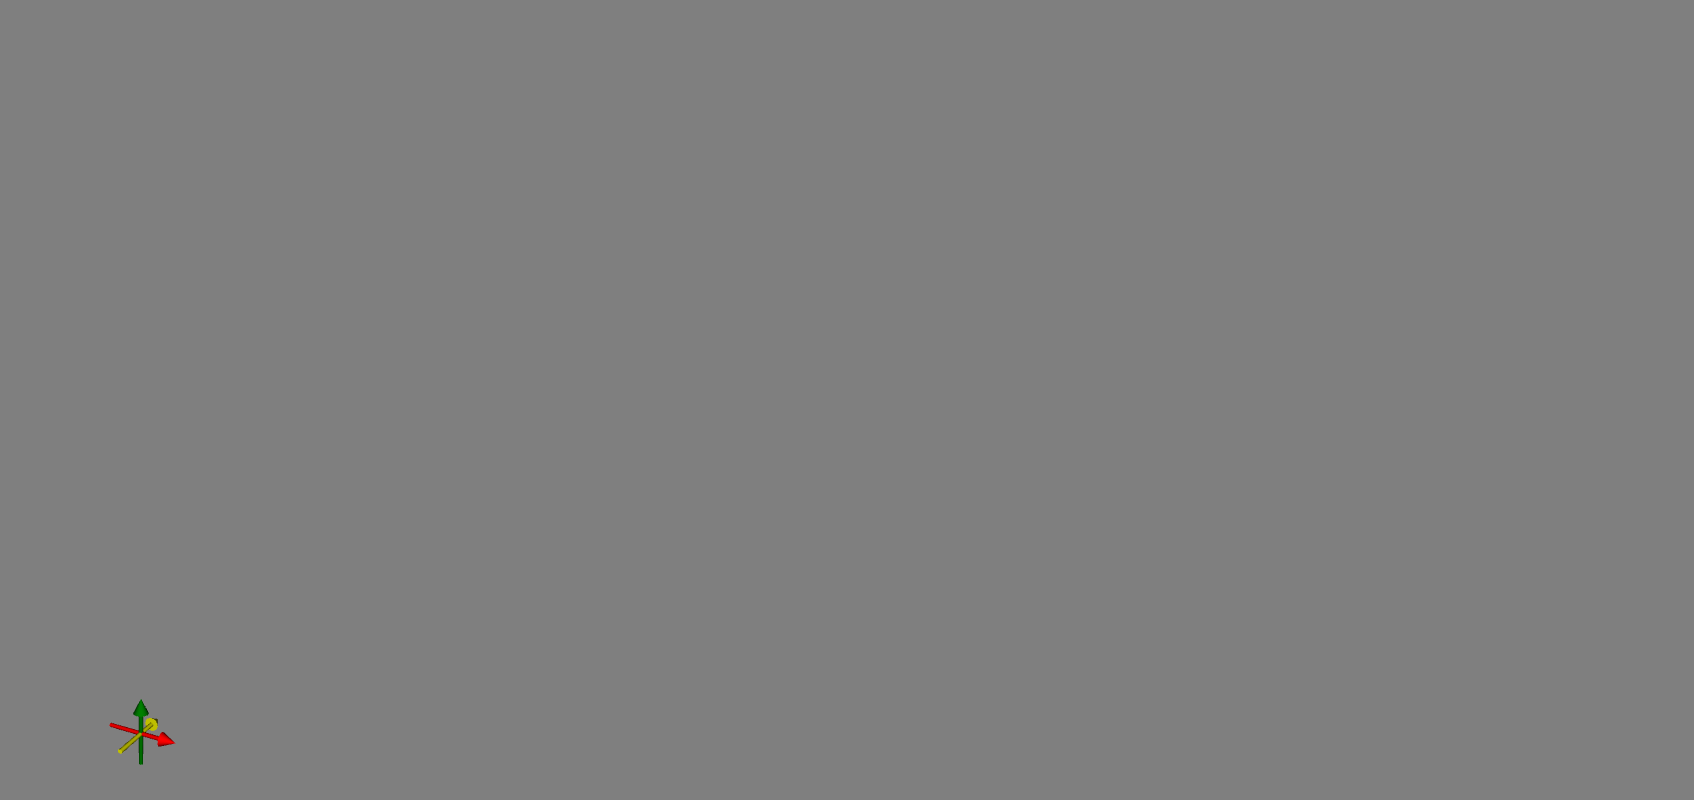
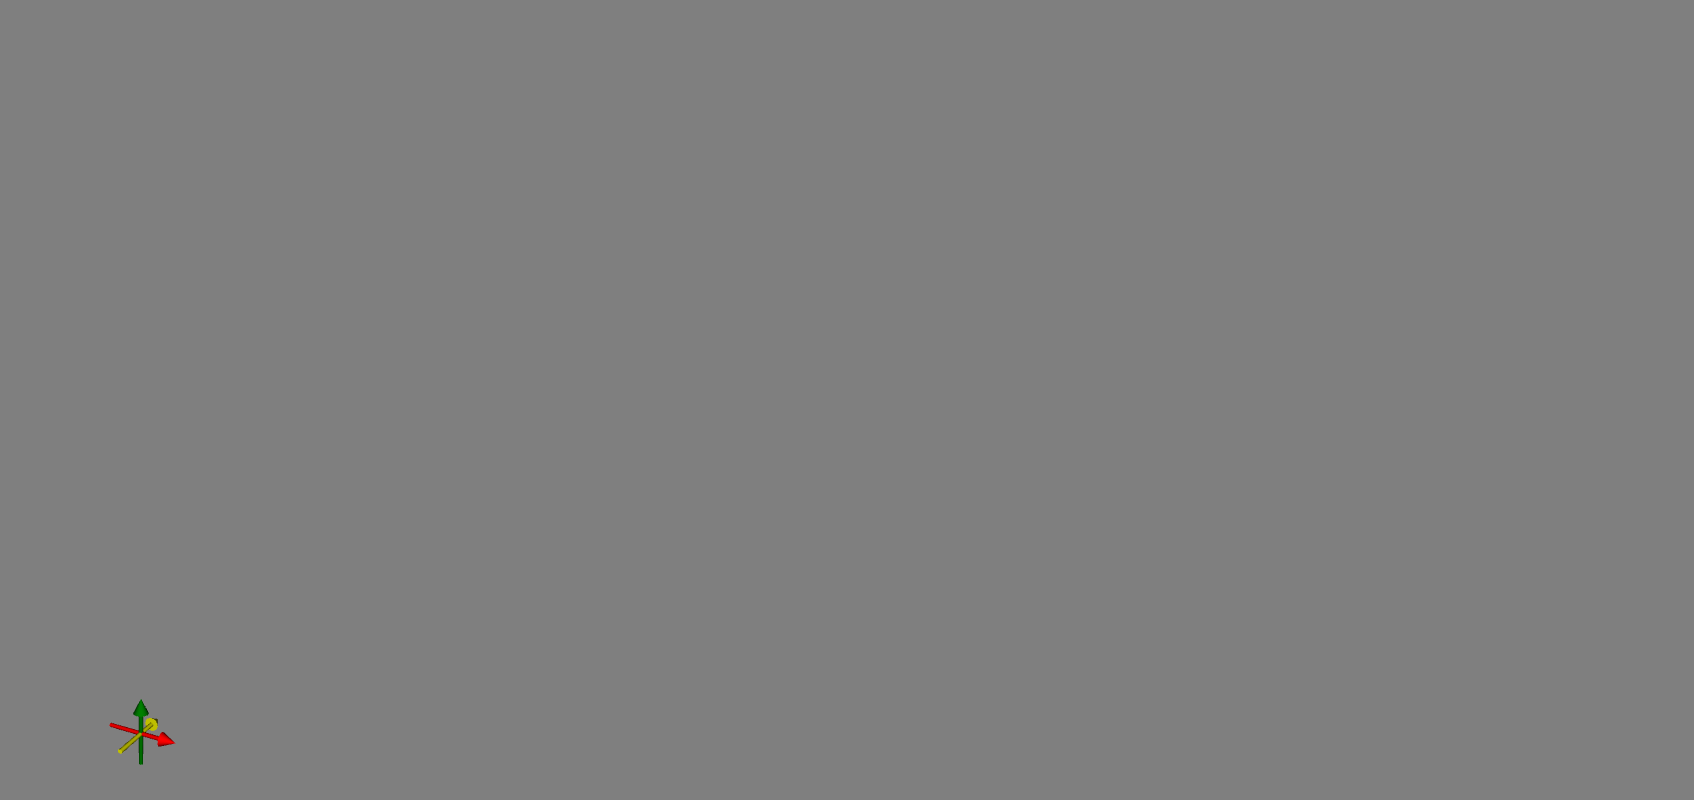

<IPython.core.display.Javascript object>

In [7]:
# In wasm
shrunk = itkwasm_downsample.downsample_bin_shrink(wasm_image, shrink_factors=[2,]*3)
view(shrunk)

Key packages involved:




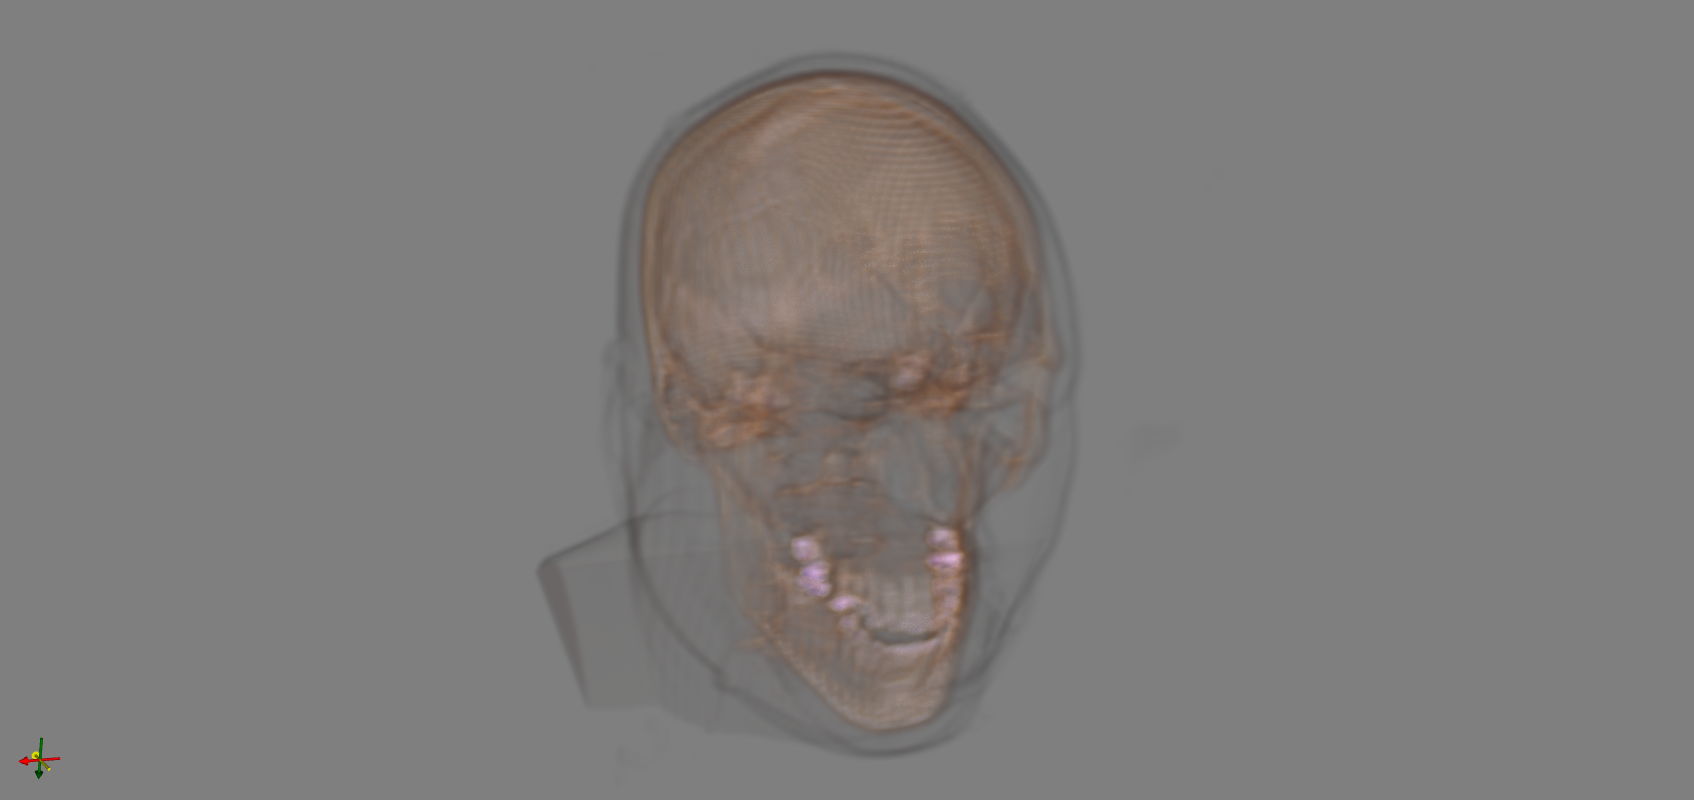
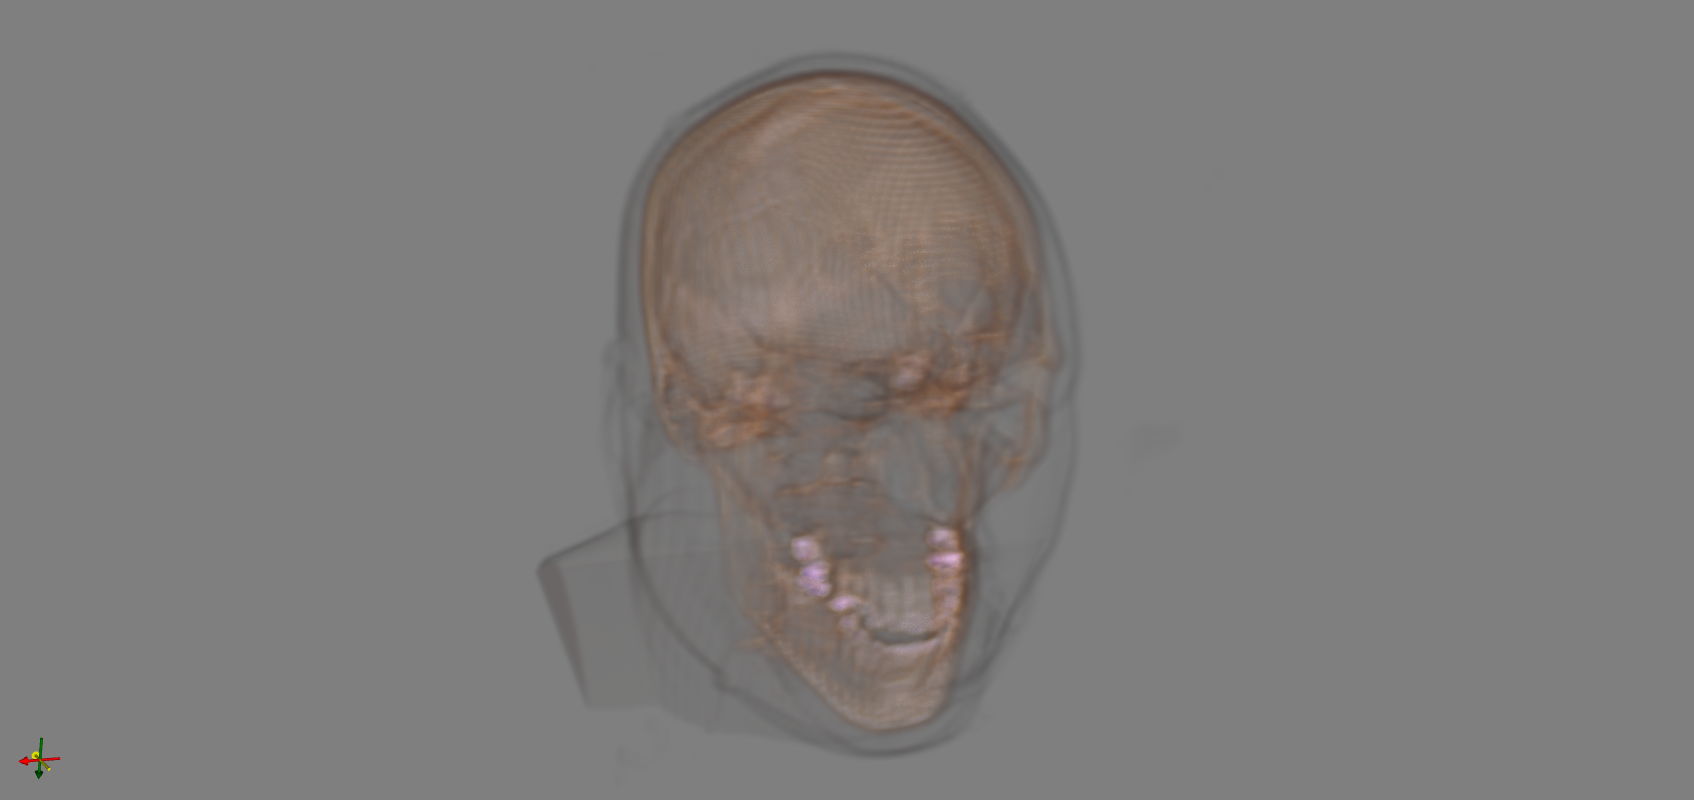

<IPython.core.display.Javascript object>

In [9]:
# Native binaries
shrunk = itk.bin_shrink_image_filter(native_image, shrink_factors=[2,]*3)
view(shrunk)

## Python Wasm in the Browser

## Browser and system APIs

While synchronous functions are available in system packages, browser packages provide asynchronous functions for non-blocking, performant execution in the JavaScript runtime event loop. These functions are called with modern Python's [async / await support](https://docs.python.org/3/library/asyncio-task.html).

## ITK-Wasm on the CLI

ITK-Wasm modules can also be executed on the command line with a webassembly interpreter.

### ITK-Wasm file formats

ITK-Wasm provides file formats corresponding to its interface types. These file formats keep wasm module sizes tiny, enable efficient and one-to-one serialization, assist with debugging, and bridge with [Web3 technologies](https://en.wikipedia.org/wiki/Web3).

The file extensions for these formats are `.iwi` and `.iwm` for images and mesh-like data, respectively. When written, these will output directories with an `index.json` file and raw binary files. When `.iwi.cbor` or `.iwm.cbor` extensions are used, a single [CBOR](https://en.wikipedia.org/wiki/CBOR) file is created.

## Enjoy ITK!